## Visualizing Audio Sample Rates

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf

Load the original audio file using librosa

In [3]:
filename = "chiyo chiyo chiyono o.wav" #insert your own audio file
y, sr = librosa.load(filename, sr=None)

print(f"Audio's sample rate: {sr/1000:.1f} kHz")

Audio's sample rate: 44.1 kHz


Use a for loop to resample the audio in 3 different sampling rates (8kHz, 30kHz, 44.1kHz)

In [4]:
sample_rates = [8000, 16000, 30000, 44100]
resampled_signals = {}

for target_sr in sample_rates:
    y_resampled = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
    resampled_signals[target_sr] = y_resampled

    sf.write(f"audio_{target_sr}Hz.wav", y_resampled, target_sr)

Plot the waveforms of audios with different sample sizes

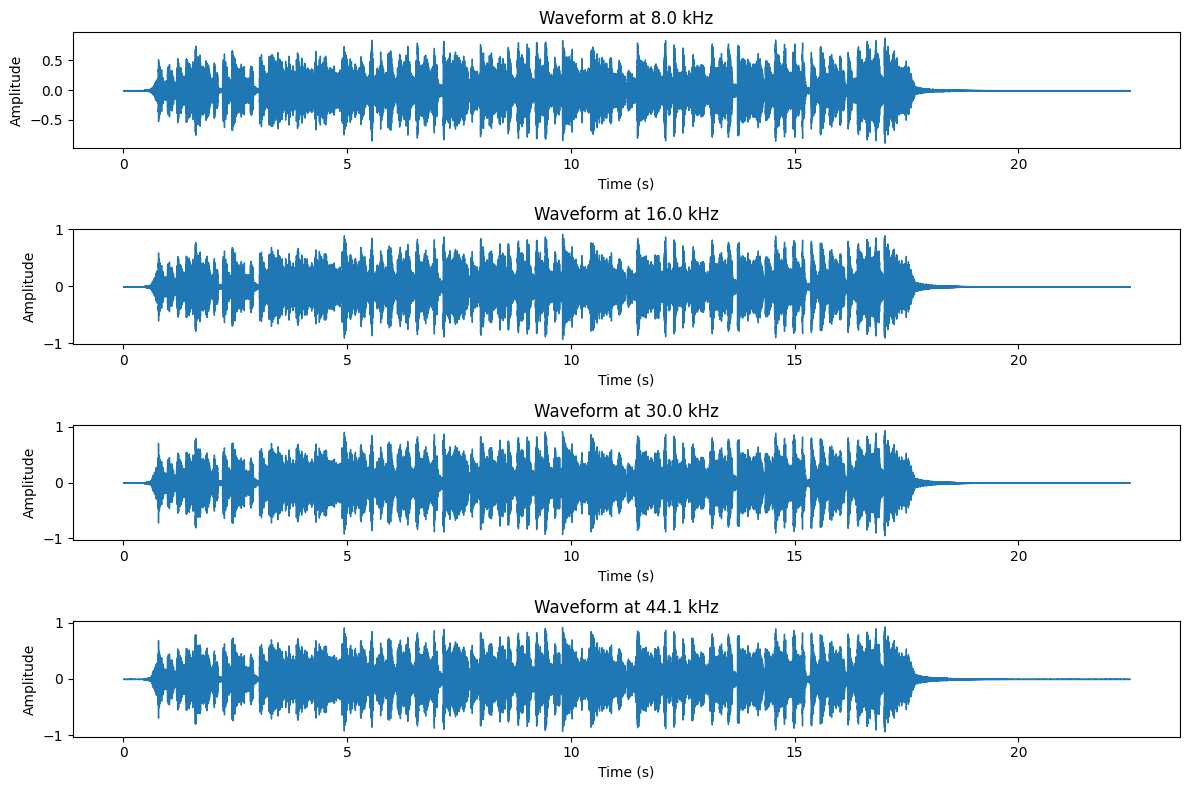

In [5]:
plt.figure(figsize=(12, 8))
for i, target_sr in enumerate(sample_rates, 1):
    plt.subplot(len(sample_rates), 1, i)
    librosa.display.waveshow(resampled_signals[target_sr], sr=target_sr)
    plt.title(f"Waveform at {target_sr/1000:.1f} kHz")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

To see the differences in waveforms of different sample rates, we will zoom in the audio waveform in to 0.003 seconds.

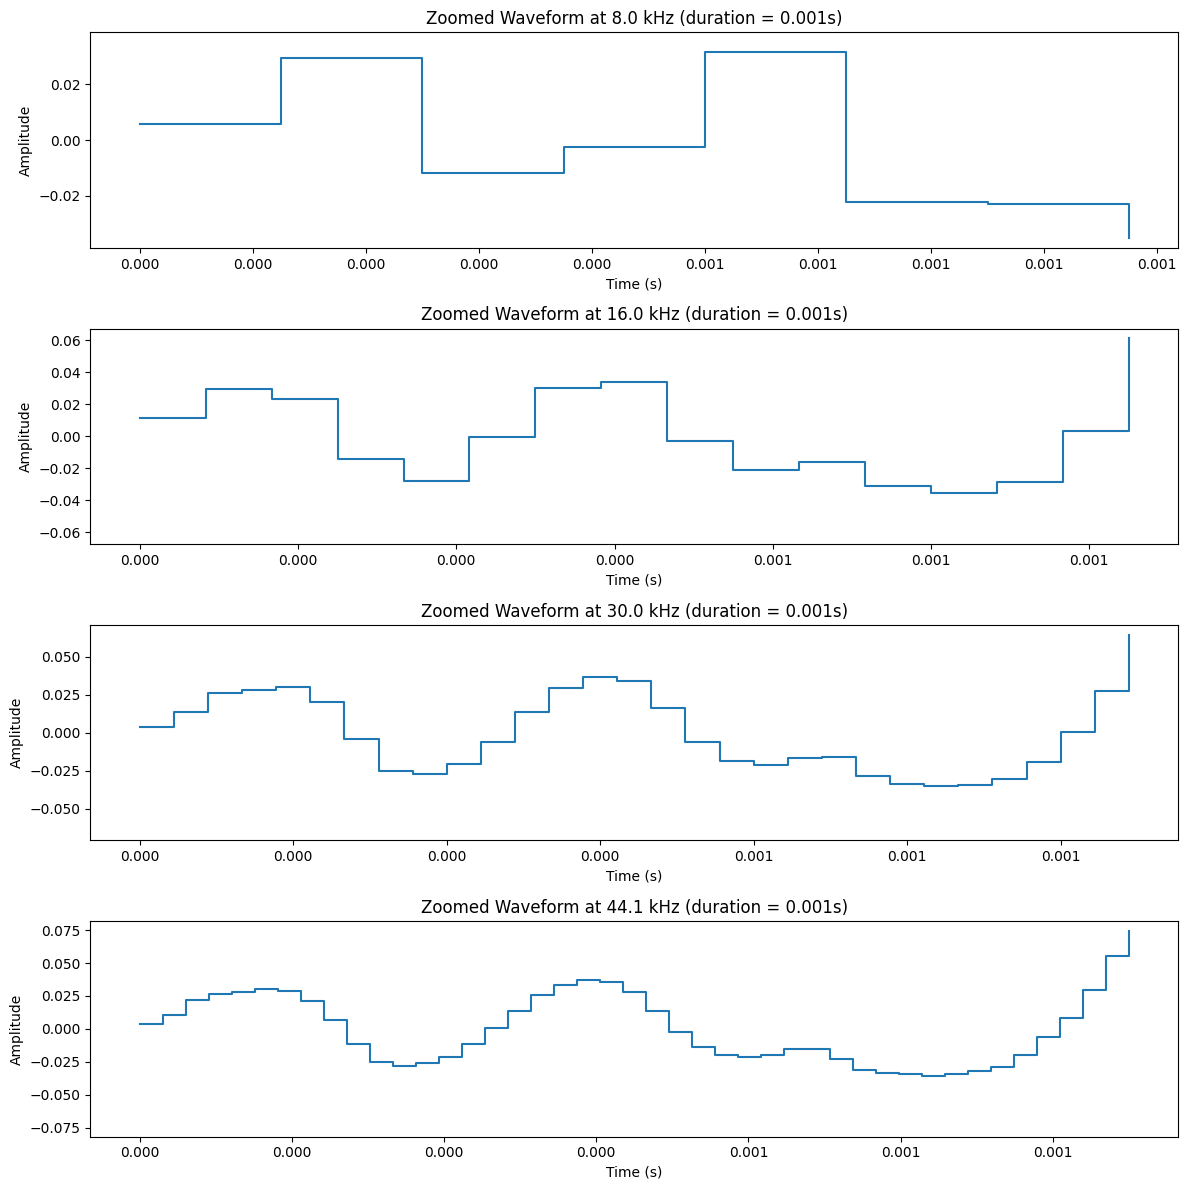

In [ ]:
plt.figure(figsize=(12, 12))
zoom_duration = 0.003  # seconds to zoom into the audio
for i, target_sr in enumerate(sample_rates, 1):
    y = resampled_signals[target_sr]
    total_samples = len(y)
    zoom_samples = int(zoom_duration * target_sr)
    center = total_samples // 2
    start = max(center - zoom_samples // 2, 0)
    end = min(center + zoom_samples // 2, total_samples)
    y_zoom = y[start:end]

    plt.subplot(len(sample_rates), 1, i)
    librosa.display.waveshow(y_zoom, sr=target_sr)
    plt.title(f"Zoomed Waveform at {target_sr/1000:.1f} kHz (duration = {zoom_duration}s)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

In [7]:

from IPython.display import Audio, display

for target_sr in sample_rates:
    print(f"Playing audio at {target_sr/1000:.1f} kHz:")
    display(Audio(f"audio_{target_sr}Hz.wav", rate=target_sr))

Playing audio at 8.0 kHz:


Playing audio at 16.0 kHz:


Playing audio at 30.0 kHz:


Playing audio at 44.1 kHz:
